In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [18]:
c = "3"
d = "7"

In [21]:
protocol = QuantumCircuit(5)
#Preparing the ebit used for superdense coding

protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

if d == "0":
    protocol.z(1)
if c == "3":
    protocol.x(3)
protocol.barrier()

#Bob's Action
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw())

┌───┐      ░       ░      ┌───┐ ░ ┌─┐            
   q_0: ┤ H ├──■───░───────░───■──┤ H ├─░─┤M├────────────
        └───┘┌─┴─┐ ░       ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐         
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├─────────
             └───┘ ░       ░ └───┘      ░  ║ └╥┘┌─┐      
   q_2: ───────────░───────░────────────░──╫──╫─┤M├──────
                   ░ ┌───┐ ░            ░  ║  ║ └╥┘┌─┐   
   q_3: ───────────░─┤ X ├─░────────────░──╫──╫──╫─┤M├───
                   ░ └───┘ ░            ░  ║  ║  ║ └╥┘┌─┐
   q_4: ───────────░───────░────────────░──╫──╫──╫──╫─┤M├
                   ░       ░            ░  ║  ║  ║  ║ └╥┘
meas: 5/═══════════════════════════════════╩══╩══╩══╩══╩═
                                           0  1  2  3  4

Meaasured 01000 with frequency 1.0


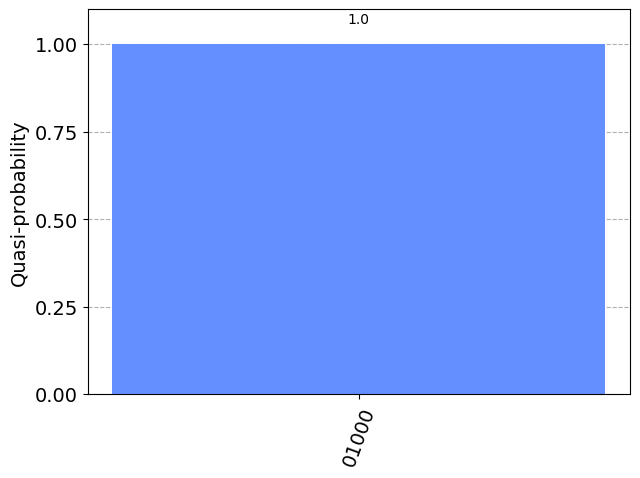

In [22]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Meaasured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))